# Encadrement de $\sqrt{2}$ par balayage

## Présentation de l'activité
- **Niveau de classe :** 
 - Classe de seconde générale.
 - Classe de première de la voie technologique (tronc commun).
- **Références au programme :** 
 - Seconde : *déterminer par balayage un encadrement de $\sqrt{2}$ d’amplitude inférieure ou égale à $10^{-n}$*.
 - Tronc commun de première de la voie technologique : *valeur approchée d’une solution d’une équation par balayage (les listes pourront être utilisées dans ce cas)*.
- **Description :** approximation de $\sqrt{2}$, par l'étude de la fonction $x\mapsto x^2-2$ et la recherche d'un zéro de cette fonction par balayage.

## Valeur approchée par défaut
Dans cette partie, nous allons déterminer par balayage une approximation par défaut de $\sqrt{2}$ avec une erreur inférieure à $10^{-n}$ en utilisant la fonction $x\mapsto x^2-2$.

**Importation des librairies graphiques**

In [1]:
import matplotlib.pyplot as plt

### Représentation de la fonction $x\mapsto x^2-2$ sur l'intervalle $[0,2]$.

La fonction `representation` trace la représentation graphique d'une fonction $f$. 
Elle utilise une subdivision de $[a,b]$ en $N$ intervalles de même longueur. 
Elle prend comme paramètres :
- les bornes $a$ et $b$ de l'intervalle $[a,b]$.
- le nombre $N$ d'intervalles de la subdivision.

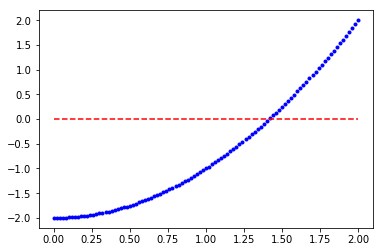

In [2]:
def f(x):
    return x**2-2

def representation(a,b,N):
    pas = (b-a)/N
    for i in range(N+1):
        x = a+i*pas
        plt.plot(x,f(x),'b.')


representation(0,2,100)   
plt.plot([0,2],[0,0],'r--')
plt.show()

<div class="alert alert-info">

Suggestions pédagogiques

</div>


* **Expliquer un programme** 
 - À quoi correspond la variable <code>pas</code> ? Comment est-elle calculée ?
 - Expliquer la ligne 7.
 - Quelle est la première valeur de `x` dans la boucle de la ligne 7 ?
 - Quelle est la dernière valeur de `x` dans la boucle de la ligne 7 ?
 - Comment obtenir une valeur approchée de $\sqrt{2}$ à l'aide du graphique ?
* **Compléter un programme** 

    Le programme précédent étant fourni en remplaçant les lignes 2, 5 et 7 par `return ...`,`pas= ...` et `x = ...`, demander aux élèves de compléter les lignes 2, 5 et 7.

* **Tester** la fonction `representation` pour l’intervalle $[0,2]$ divisé en 100 parties.

<div class="alert alert-warning">

Remarque

</div>

Ici, la fonction `plot` est utilisée au fur et à mesure du calcul car la notion de liste ne figure pas au programme de la classe de seconde.

### Approximation de $\sqrt{2}$

Le programme suivant donne une approximation par défaut de $\sqrt{2}$ avec une erreur inférieure à $10^{-2}$.

In [3]:
a = 0
b = 2
N = 200
pas = (b-a)/N

estimation = a        
while f(estimation)<0:
    estimation = estimation + pas
    
        
print("Estimation de racine de racine de 2:",estimation)        
print("Estimation de racine de 2 au carré:",estimation**2)

Estimation de racine de racine de 2: 1.420000000000001
Estimation de racine de 2 au carré: 2.016400000000003


<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Expliquer un programme**
  
  Expliquer la valeur de `N` ligne 3.
* **Compléter un programme**

    Le programme précédent étant fourni en remplaçant les lignes 6, 7 et 8 par `estimation = ...`, `while ...` et  `estimation = ...`, demander aux élèves de compléter les lignes 6, 7 et 8. 

### Animation susceptible d'être présentée aux élèves
Le schéma de gauche montre le déplacement de la droite de balayage (droite verte).
Sur le côté droit, la courbe représente les différentes valeurs prises par la variable de balayage $x$. Partant de la valeur 0, la variable x est, tant que $f(x)\leq0$, incrémentée à chaque étape de la valeur du pas. Dès que $f(x)>0$, la variable de balayage $x$ garde une valeur constante égale à la dernière valeur de $x$ pour laquelle $f(x)\leqslant 0$, qui constitue une valeur approchée par défaut de $\sqrt{2}$ à la précision souhaitée.

In [11]:
%matplotlib inline
import matplotlib.animation
from IPython.display import HTML


def subdivisionIntervalle(a,b,N):
    pas = (b-a)/N
    return [a+i*pas for i in range(N+1)]

# constantes
nbFrames = 30
nbSubdivision = 30
a = 0
b = 2
pas = (b-a)/nbSubdivision
estimations = [0]
evolutionAbscisse = subdivisionIntervalle(a,b,nbSubdivision)

# points de la courbe pour le tracé
abscisses = subdivisionIntervalle(a,b,100)
ordonnees = [f(x) for x in abscisses]

#Création des figures
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
ax1.plot(abscisses,ordonnees)
ax1.plot([a,b],[0,0],'r--')
courbeVert, = ax1.plot([],[],'g--',)
courbeConvergence, = ax2.plot([],[],color="green")

#Réglage des axes
ax2.set_xlim(( 0, 2))
ax2.set_ylim((0, 2))

def init():
    return (courbeVert,)

def animate(i):
    x =evolutionAbscisse[i]
    estim = estimations[-1]
    if f(x)<=0:
        estimations.append(x)
    else:
        ax2.plot([estim,estim],[a,b],'--',color='orange')
        ax2.plot([estim+pas,estim+pas],[a,b],'--',color='orange')
        return (courbeVert,)
        estimations.append(estim)
    courbeVert.set_data([x,x],[-2,2])
    courbeConvergence.set_data(evolutionAbscisse[:i+2],estimations)
    ax1.set_title("x $\simeq$ {0:.2f}".format(x))
    ax2.set_title("{0:.2f} $\leq$ estimation $\leq$ {1:.2f}".format(estim+pas,estim+2*pas))
    return (courbeVert,)

plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=nbFrames,init_func=init,interval=300)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

### Encadrement de $\sqrt{2}$ à $10^{-n}$ par balayage

On cherche à déterminer un encadrement de $\sqrt{2}$ à $10^{-2}$ près par balayage. La valeur approchée précédemment obtenue étant la plus grande valeur de $x$ pour laquelle $f(x)\leq 0$, si on ajoute à $x$ la valeur du pas (ici $10^{-2}$), on a $f(x+10^{-2})>0$ et donc $x\leq\sqrt{2}<x+10^{-2}$, ce qui donne un encadrement de $\sqrt{2}$.

In [5]:
a = 0
b = 2
N = 200
estimationGauche = 0

pas = (b-a)/N

estimationGauche = a        
while f(estimationGauche)<0:
    estimationGauche = estimationGauche + pas

estimationDroite = estimationGauche + (2-0)/200  

print("Encadrement de racine de 2 à 10**{-2} près:",estimationGauche,estimationDroite)        

Encadrement de racine de 2 à 10**{-2} près: 1.420000000000001 1.430000000000001


<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Expliquer un programme**

    Que fait l'instruction de la ligne 12 ?
* **Compléter un programme**

    Le programme précédent étant fourni en remplaçant la ligne 12 par `estimationDroite = ...`, demander aux élèves de compléter la ligne 12.

### Animation susceptible d'être présentée aux élèves
Balayage à double sens : à partir de $0$ par valeurs croissantes et à partir de $2$ par valeurs décroissantes.

In [6]:
%matplotlib inline
import matplotlib.animation
from IPython.display import HTML

# constantes
nbFrames = 20
nbSubdivision = 30
a = 0
b = 2
pas = (b-a)/nbSubdivision
estimations = [0]
estimationsD = [2]
evolutionAbscisse = subdivisionIntervalle(a,b,nbSubdivision)
evolutionAbscisseD = evolutionAbscisse[::-1]
trouve = False

# points de la courbe pour le tracé
abscisses = subdivisionIntervalle(a,b,100)
ordonnees = [f(x) for x in abscisses]

#Création des figures
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
ax1.plot(abscisses,ordonnees)
ax1.plot([a,b],[0,0],'r--')
courbeVert, = ax1.plot([],[],'g--',)
courbeViolette, = ax1.plot([],[],'m--',)
courbeConvergenceG, = ax2.plot([],[],color="g", label='Balayage gauche')
courbeConvergenceD, = ax2.plot([],[],color="m", label='Balayage droit')

#Réglage des axes
ax2.set_xlim(( 0, 2))
ax2.set_ylim((0, 2.1))

def init():
    trouve = False
    borneA = 0
    borneB = 2
    return (courbeVert,)

def animate(i):
    global trouve,borneA,borneB
    x1 =evolutionAbscisse[i]
    x2 = evolutionAbscisseD[i]
    estim = estimations[-1]
    estimD = estimationsD[-1]
    
    
    if trouve:
        ax2.plot([borneA,borneA],[a,b],'--',color='orange')
        ax2.plot([borneB,borneB],[a,b],'--',color='orange')
        ax2.set_title("{0:.2f} $\leq$ estimation $\leq$ {1:.2f}, pas = {2:.2f}".format(borneA,borneB,pas))
        return (courbeVert,)
    
    if f(x1)<=0:
        estimations.append(x1)
    else:
        trouve = True
        borneA = estim
        borneB =  estim+pas
    if f(x2)>=0:
        estimationsD.append(x2)
    else:
        trouve = True
        borneA = estimD-pas
        borneB =  estimD
        return (courbeVert,)
    evolutionInverse = evolutionAbscisse[:i+2]
    courbeVert.set_data([x1,x1],[-2,2])
    courbeViolette.set_data([x2,x2],[-2,2])
    courbeConvergenceG.set_data(evolutionAbscisse[:i+2],estimations)
    courbeConvergenceD.set_data(evolutionAbscisseD[:i+2],estimationsD)
    ax1.set_title("$x_1$ $\simeq$ {0:.2f}, $x_2$ $\simeq$ {1:.2f}".format(x1,x2))
    #ax2.set_title("Intervalle : [{0:.2f},{1:.2f}]".format(estim,estimD))
    ax2.set_title("{0:.2f} $\leq$ estimation $\leq$ {1:.2f}".format(estim,estimD))
    return (courbeVert,)

ax2.legend()
plt.close()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=nbFrames,init_func=init,interval=300)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())